### Numpy array Vs Python Lists

- Speed Fast and less memory storage 


In [30]:
# speed
# python list
a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]
c = []
import time

start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time() - start)

2.188876152038574


In [31]:
# Numpy
import numpy as np

a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start = time.time()
c = a + b
print(time.time() - start)

0.21087026596069336


In [32]:
# Python  Memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [33]:
# Numpy Memory
a = np.arange(10000000)
sys.getsizeof(a)

80000112

In [34]:
a = np.arange(10000000, dtype=np.int32)
sys.getsizeof(a)

40000112

### Advanced Indexing

- Two type 1.Fancing indexing and 2.Boolean indexing

In [35]:
a1 = np.arange(12).reshape(4, 3)
a2 = np.arange(24).reshape(6, 4)
print(a1)
print()
print(a2)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [36]:
# Fancing indexing
c = a1[[0, 2, 3]]
print(c)
print()
a2[[0, 2, 3, 5]]

[[ 0  1  2]
 [ 6  7  8]
 [ 9 10 11]]



array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [37]:
# Boolean Indexing
a = np.random.randint(1, 100, 24).reshape(6, 4)
a

array([[79,  3,  1,  5],
       [20, 38, 88, 94],
       [37, 18, 69,  4],
       [72, 81,  1, 42],
       [ 3, 36, 62, 96],
       [75, 29, 41, 24]], dtype=int32)

In [38]:
# find all number greater than 50
a > 50

array([[ True, False, False, False],
       [False, False,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False],
       [False, False,  True,  True],
       [ True, False, False, False]])

In [39]:
# find all number greater than 50 -only those number greater than 50
a[a > 50]

array([79, 88, 94, 69, 72, 81, 62, 96, 75], dtype=int32)

In [40]:
# find out even numbers
a % 2 == 0

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [False,  True, False,  True],
       [ True, False, False,  True],
       [False,  True,  True,  True],
       [False, False, False,  True]])

In [41]:
# find out even numbers
a[a % 2 == 0]

array([20, 38, 88, 94, 18,  4, 72, 42, 36, 62, 96, 24], dtype=int32)

In [43]:
# find all number greater than 50 and are even
a[(a > 50) & (a % 2 == 0)]

array([88, 94, 72, 62, 96], dtype=int32)

In [ ]:
# find all number divisible by 7?
a[a % 7 == 0]

array([42], dtype=int32)

In [45]:
# find all number not divisible by 7?
a[~(a % 7 == 0)]

array([79,  3,  1,  5, 20, 38, 88, 94, 37, 18, 69,  4, 72, 81,  1,  3, 36,
       62, 96, 75, 29, 41, 24], dtype=int32)

### Broadcasting

- The term broadcasting describes how Numpy treats arrays with different shapes during arithmetic operations.
- The smaller array is "broadcast" across the larger array so that they have compatible shapes.

In [46]:
# same shape
a = np.arange(6).reshape(2, 3)
b = np.arange(6, 12).reshape(2, 3)

print(a)
print()
print(b)
print()
print(a + b)

[[0 1 2]
 [3 4 5]]

[[ 6  7  8]
 [ 9 10 11]]

[[ 6  8 10]
 [12 14 16]]


In [47]:
# diff shape
a = np.arange(6).reshape(2, 3)
b = np.arange(3).reshape(1, 3)

print(a)
print()
print(b)
print()
print(a + b)

[[0 1 2]
 [3 4 5]]

[[0 1 2]]

[[0 2 4]
 [3 5 7]]


### Broadcasting Rules

#### 1.Make the two arrays have the same number of dimension.
- If the numbers of dimension of the two arrays are different,add new dimensions with size 1 to the head of the array with the
smaller dimension

### 2.Make each dimension of the two arrays the same size.
- If the sizes of each dimension of the arrays do not match, dimension with size 1 are strectched to the size of the other array
- If there is a dimension whose size is not 1 in either of the two arrays,it cannot be broadcasting,and an error is raised.

In [ ]:
# Example:1
a = np.arange(12).reshape(4, 3)
b = np.arange(3)

print(a)
print()
print(b)
print()
print(a + b)


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

[0 1 2]

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [49]:
# Example:2
a = np.arange(12).reshape(3, 4)
b = np.arange(3)

print(a)
print()
print(b)
print()
print(a + b)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[0 1 2]



ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [50]:
# Example:3
a = np.arange(3).reshape(1, 3)
b = np.arange(3).reshape(3, 1)

print(a)
print()
print(b)
print()
print(a + b)

[[0 1 2]]

[[0]
 [1]
 [2]]

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [51]:
# Example:4
a = np.arange(12).reshape(1, 3)
b = np.arange(3).reshape(4, 1)

print(a)
print()
print(b)
print()
print(a + b)

ValueError: cannot reshape array of size 12 into shape (1,3)

In [52]:
# Example:5
a = np.arange(3).reshape(1, 3)
b = np.arange(4).reshape(4, 1)

print(a)
print()
print(b)
print()
print(a + b)

[[0 1 2]]

[[0]
 [1]
 [2]
 [3]]

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [53]:
# Example:6
a = np.array([1])
# shape ->(1,1)
b = np.arange(4).reshape(2, 2)
# shape -> (2,2)

print(a)
print()
print(b)
print()
print(a + b)

[1]

[[0 1]
 [2 3]]

[[1 2]
 [3 4]]


### Working with mathematical formulas

- Sigmoid

In [ ]:
def sigmoid(array):
    return 1 / (1 + np.exp(-(array)))

a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

- Mean square error

In [57]:
actual = np.random.randint(1, 50, 25)
predicted = np.random.randint(1, 50, 25)

In [ ]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

mse(actual, predicted)

np.float64(545.24)

### Working with missing values

In [59]:
# Working with missing values-> np.nan
a = np.array([1, 2, 3, 4, np.nan, 6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [60]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [61]:
a[np.isnan(a)]

array([nan])

In [62]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

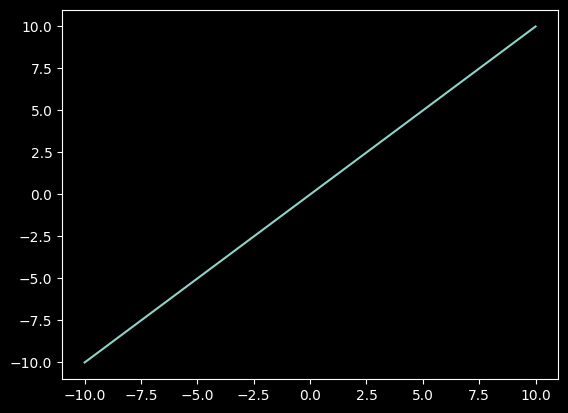

In [63]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = x
plt.plot(x, y)

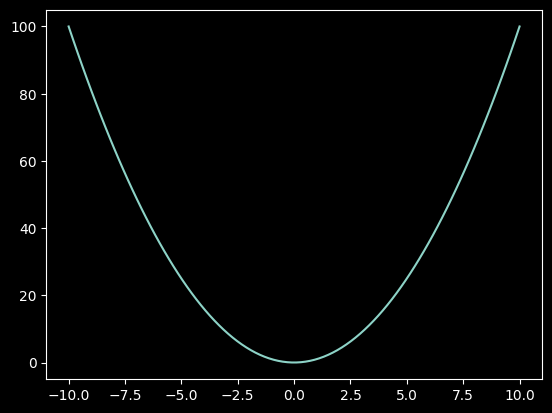

In [64]:
# y = x^2
x = np.linspace(-10, 10, 100)
y = x**2

plt.plot(x, y)

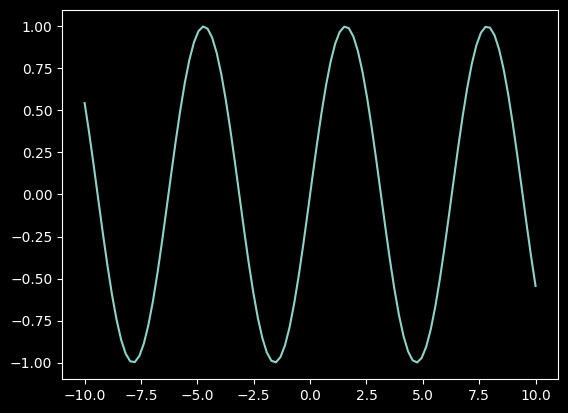

In [65]:
# y = sin(x)
x = np.linspace(-10, 10, 100)
y = np.sin(x)

plt.plot(x, y)

C:\Users\pramo\AppData\Local\Temp\ipykernel_5460\3989772061.py:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


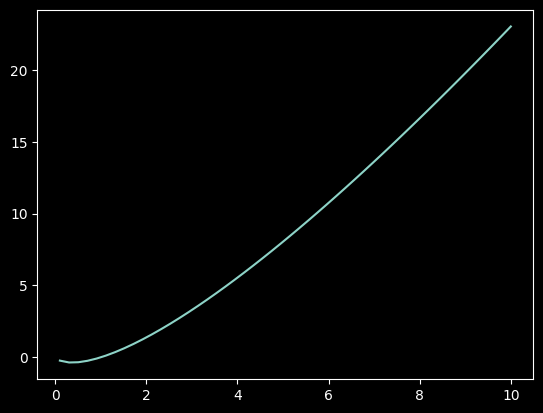

In [66]:
# y = xlog(x)
x = np.linspace(-10, 10, 100)
y = x * np.log(x)
plt.plot(x, y)

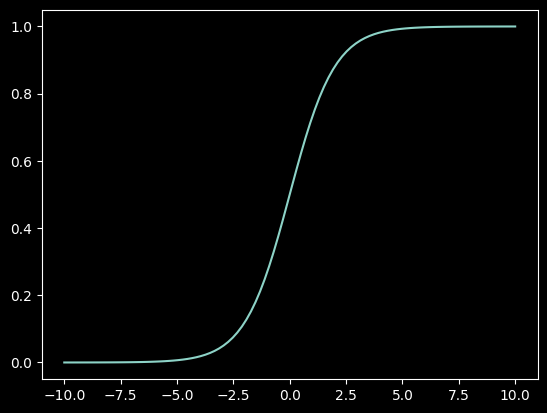

In [67]:
# sigmoid
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)